# Housing project Assignment

## Lets import the required libraries

In [197]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns", None)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures

In [198]:
house = pd.read_csv("train.csv", na_values="NAN")

In [199]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [200]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Lets draw a distplot to confirm the relationship

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

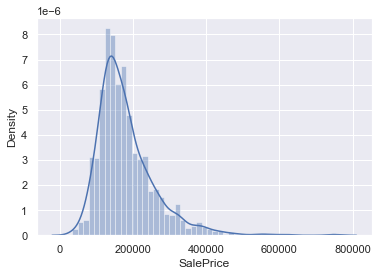

In [201]:
sns.distplot(house['SalePrice'])

#### Most of the properties are average price but couple of are high price

In [202]:
print("Skewness:", house['SalePrice'].skew())

Skewness: 1.8828757597682129


In [203]:
 print("Kurtosis: %f" % house['SalePrice'].kurt())

Kurtosis: 6.536282


###### Identify the skewness of the data , Here its positive Sknewness or right skewness as the value is more than Zero. As per the the skew 1.88 , this data is positively skewed distributed.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

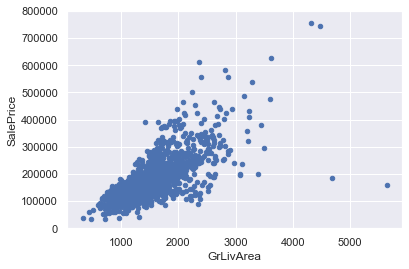

In [204]:
var = 'GrLivArea'
data = pd.concat([house['SalePrice'], house[var]], axis =1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

## Lets have a look at the data distrubution trend over the years 

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

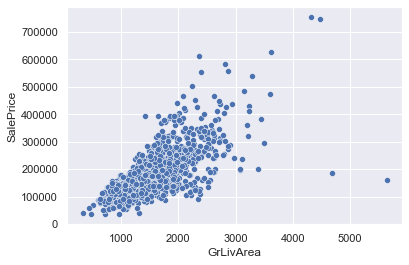

In [205]:
sns.scatterplot(data=house, x='GrLivArea', y='SalePrice')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

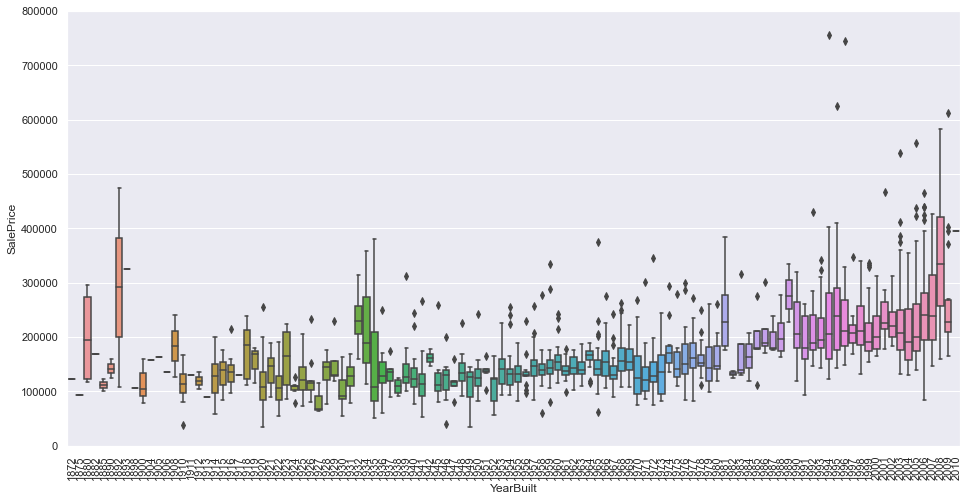

In [206]:
var = 'YearBuilt'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

##### We can clearly see a trend here .. as the year goes down Sale price reduced as well.

## Lets have a look at the Linear relation between SalePrice and GrLivArea (Ground Living Area)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

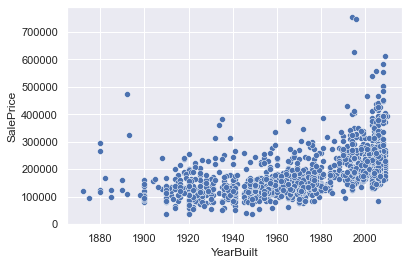

In [207]:
sns.scatterplot(data=house, x='YearBuilt', y='SalePrice')

#### Noticed  the trend as Saleprice increase over the year 

### Lets have a look at the trend based on Utlilities 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

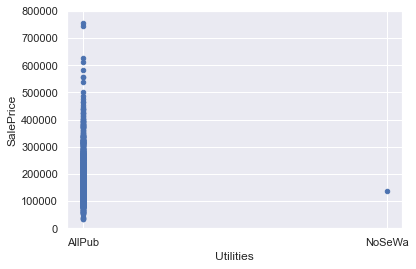

In [208]:
var = 'Utilities'
data = pd.concat([house['SalePrice'], house[var]], axis =1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

#### Most of the house got All Public Utilities so this cannot be considerrd as an importat feature, lets prove that using correlation matrix

## Lets Prepare a Correlation Matrix to identfy the potential candidates

<AxesSubplot:>

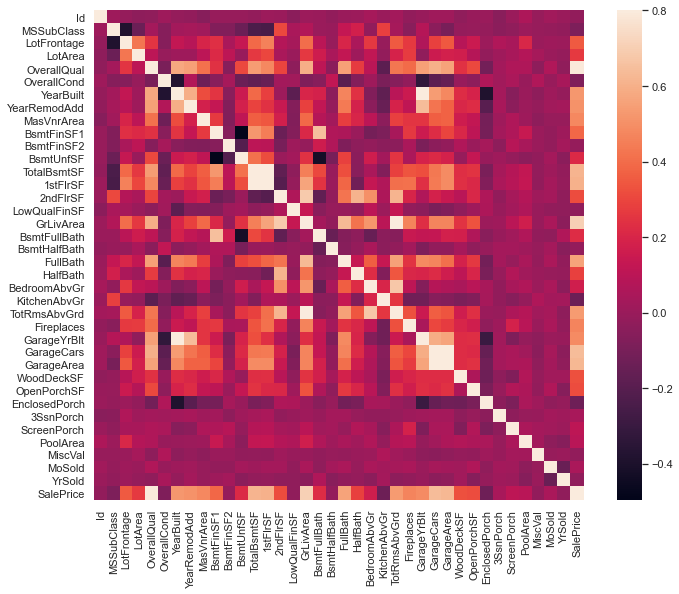

In [209]:
cormat = house.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(cormat, vmax=0.8, square=True)

### Anything between 0.6 and 0.8 is high correlation. So light white or yellow colured is higher correaltion. 
### so above correlation matrix says SalesPrice got high postive correaltion with OverallQality, GrLive Area,  GarageCars, GarageArea etc
### and Sale price is negatively correlated wth KitchenAbiveGr and EnclosedPorch, OverallCond etc

## Lets draw a scatter plot of all the High correlated response columns

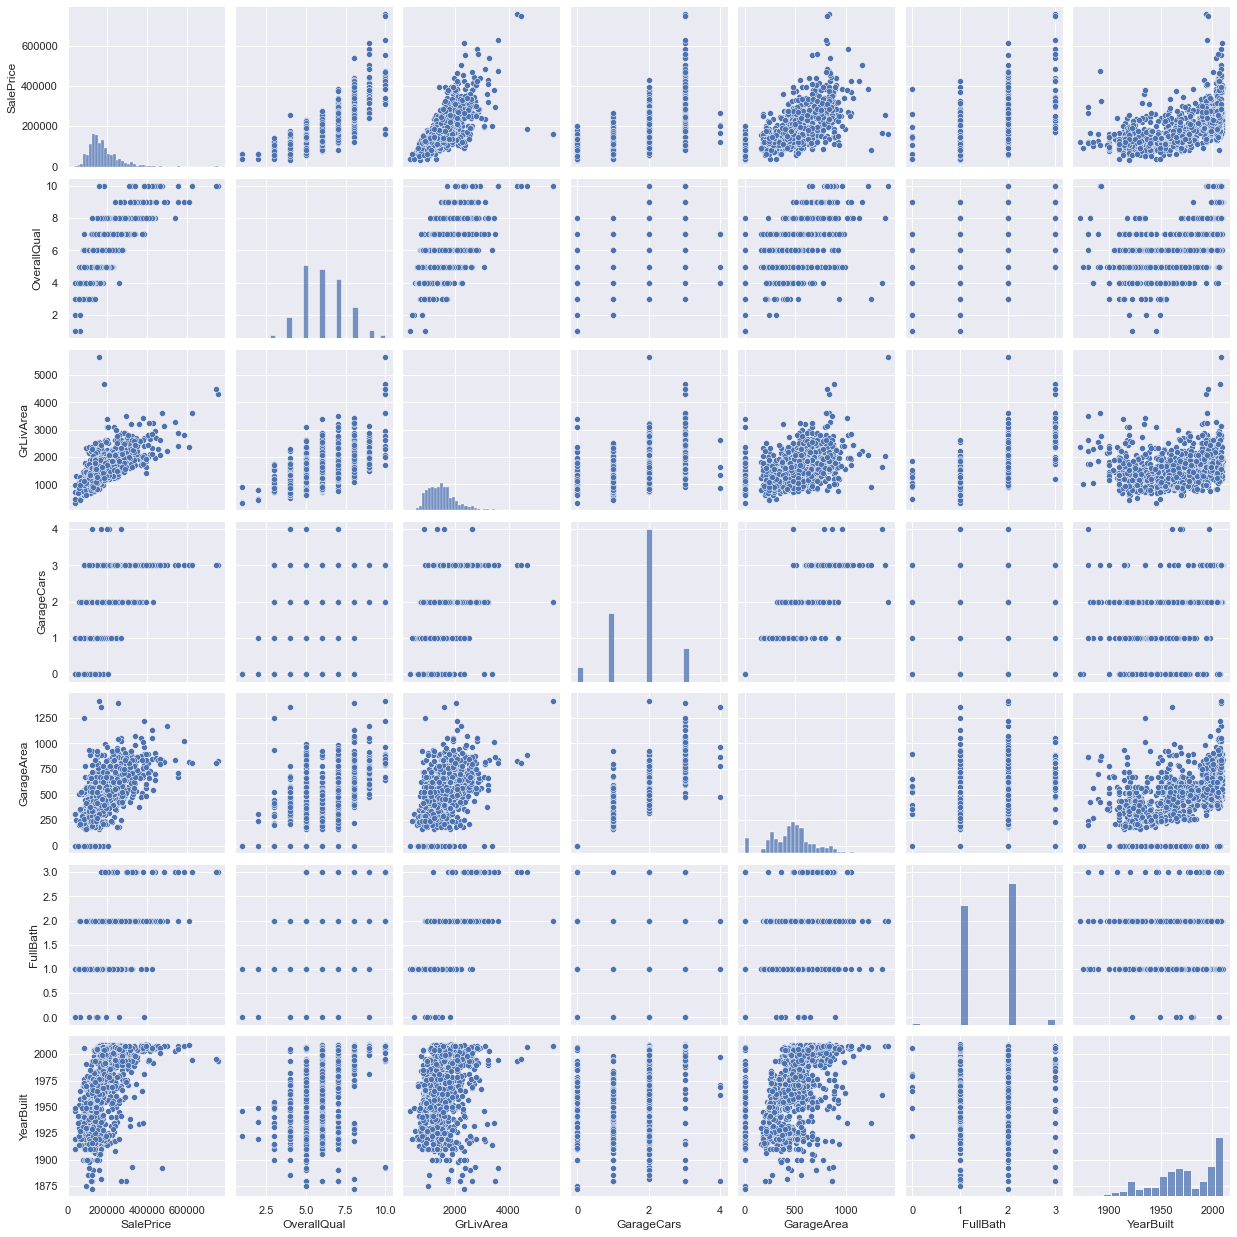

In [210]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size=2.5)
plt.show();

## Lets do EDA to handle missing Data

###### As per the data given couple of features values are marked as NA which Pandas considerd as Null Value, We need to handle those features

In [211]:
# Lets see How many missing data for each features
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


##### PoolQC got 99% missing data that sounds this feature need to be validate, same applies for Misc Features as well.
##### Pandas considered actual value "NA" as null values , but those NA got a real meaning of "No Pool", "No Fence", "No Alley" etc So we need to handle this Null Values using Imputing methods

##### For Catagorcial imputing lets fill the missing values with most common term that appeared from the entire column

In [212]:
# Go through the Data Description and identify the features whoes NA value has meaning
null_got_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_got_meaning:
    house[i].fillna("None", inplace=True)
    house[i].fillna("None", inplace=True)

In [213]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Lets Impute "Real" NA values

##### For numerical imputing lets fill missing values with a measures like Median

In [214]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy="median")

In [215]:
# Have a look at the missing data again
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000


In [216]:
# LotFrontage got lots of null values, so lets drop it from our datset
house.drop("LotFrontage", axis=1, inplace=True)

In [217]:
# lets finding the missing data again 
# Have a look at the missing data again
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000


In [218]:
# MasVnrType is a catagorical so we have to replace the missing values with Median, we cant use "None"
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["MasVnrType"].fillna("None", inplace=True)

In [219]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


In [220]:
# No wonly one row got null entry lets drop that row
house.dropna(inplace=True)

In [221]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [222]:
# Lets have a look at the dataset now 
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [223]:
### Lets determine the data type of all the remaining features
types_train = house.dtypes
num_train = types_train[(types_train == 'int64') | (types_train == float)]
cat_train = types_train[types_train == object]
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

In [224]:
numerical_train = list(num_train.index)
print(numerical_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [225]:
# Lets have a look at catogorical features as well 
categorical_train = list(cat_train.index)
print(categorical_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Feature Engineering 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

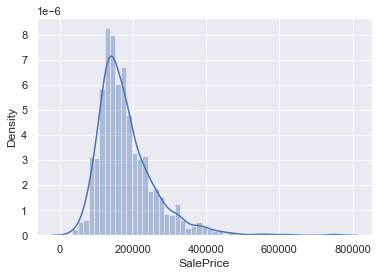

In [226]:
sns.distplot(house['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

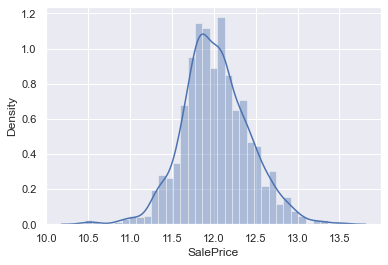

In [227]:
# Lets do a LOG transfer of SalePrice to normalise the data
sns.distplot(np.log(house['SalePrice']))

##### Its clear that SalePrice is highly skewed and log transfer makes it normally distriutes

In [228]:
##### so lets prepare a transfered featiure TransformedPrice
house['TransformedPrice'] = np.log(house['SalePrice'])

In [229]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,12.429216


In [230]:
print(set(house['LotShape']))
print(house.loc[house['LotShape']== 'IR1', 'LotShape'])

{'Reg', 'IR3', 'IR1', 'IR2'}
2       IR1
3       IR1
4       IR1
5       IR1
7       IR1
       ... 
1429    IR1
1431    IR1
1433    IR1
1440    IR1
1446    IR1
Name: LotShape, Length: 484, dtype: object


In [231]:
##### Lets do one hot transfer for categorical features
for i in categorical_train:
    feature_set = set(house[i])               # get all the unique value of the feature
    for j in feature_set:
        feature_list = list(feature_set)      # make it as list to get index
        house.loc[house[i] == j, i] = feature_list.index(j)  # Identfy all the rows with that Feature and Value and assign respective index

In [232]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,4,8450,0,2,0,2,0,2,1,2,4,3,1,2,7,5,2003,2003,0,0,0,0,1,196.0,3,3,5,1,2,0,1,706,6,0,150,856,0,1,0,2,856,854,0,1710,1,0,2,1,3,1,3,8,6,0,5,0,2003.0,1,2,548,3,3,0,0,61,0,0,0,0,1,4,3,0,2,2008,1,1,208500,12.247694
1,2,20,4,9600,0,2,0,2,0,4,1,23,6,3,1,0,6,8,1976,1976,0,0,2,2,3,0.0,0,3,0,1,2,2,3,978,6,0,284,1262,0,1,0,2,1262,0,0,1262,0,1,2,0,3,1,0,6,6,1,3,0,1976.0,1,2,460,3,3,0,298,0,0,0,0,0,1,4,3,0,5,2007,1,1,181500,12.109011
2,3,60,4,11250,0,2,2,2,0,2,1,2,4,3,1,2,7,5,2001,2002,0,0,0,0,1,162.0,3,3,5,1,2,3,1,486,6,0,434,920,0,1,0,2,920,866,0,1786,1,0,2,1,3,1,3,6,6,1,3,0,2001.0,1,2,608,3,3,0,0,42,0,0,0,0,1,4,3,0,9,2008,1,1,223500,12.317167
3,4,70,4,9550,0,2,2,2,0,3,1,13,4,3,1,2,7,5,1915,1970,0,0,1,10,3,0.0,0,3,3,2,1,0,3,216,6,0,540,756,0,2,0,2,961,756,0,1717,1,0,1,0,3,1,3,7,6,1,2,6,1998.0,3,3,642,3,3,0,0,35,272,0,0,0,1,4,3,0,2,2006,1,5,140000,11.849398
4,5,60,4,14260,0,2,2,2,0,4,1,18,4,3,1,2,8,5,2000,2000,0,0,0,0,1,350.0,3,3,5,1,2,1,1,655,6,0,490,1145,0,1,0,2,1145,1053,0,2198,1,0,2,1,4,1,3,9,6,1,3,0,2000.0,1,3,836,3,3,0,192,84,0,0,0,0,1,4,3,0,12,2008,1,1,250000,12.429216


###### Perfect ! We transforemd all the categorical string into numbers

# Model Building

###### Now we have explored the data and identified the type of data we are deling with, found the potential candidates to deal with.

In [233]:
# Lets prepare or X and Y , resposne adn predict features. drop the features which is not use for the analysis
X = house.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y = house["TransformedPrice"].values

In [234]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [235]:
# Lets build a basic Linear Regression model ie Unregularasied Model
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"Training R2: {lr.score(X_train, y_train)}")
print(f"Testing R2: {lr.score(X_test, y_test)}")


Training R2: 0.9134105194589447
Testing R2: -3.3180358179876333


##### Its clearly overfitting as 91% fit in Training and 44% fit in Test shows that this model is over fitting. 

In [236]:
### Lets apply LASSO regularisation now
alphas = [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
for i in alphas:
    print(f"Alpha: {i}")
    lr = Lasso(alpha=i)
    lr.fit(X_train, y_train)
    print(f"Training R2: {lr.score(X_train, y_train)}")
    print(f"Testing R2: {lr.score(X_test, y_test)}")

Alpha: 1e-08
Training R2: 0.9134105194560539
Testing R2: -3.317965664966353
Alpha: 1e-07
Training R2: 0.9134105191698512
Testing R2: -3.317334313953344
Alpha: 1e-06
Training R2: 0.9134104905496689
Testing R2: -3.3110234419519244
Alpha: 1e-05
Training R2: 0.913407628550217
Testing R2: -3.2481771430368207
Alpha: 0.0001
Training R2: 0.9131299449297646
Testing R2: -2.64459903482871
Alpha: 0.001
Training R2: 0.8920425236875711
Testing R2: 0.7645991013733381
Alpha: 0.01
Training R2: 0.8663138399861062
Testing R2: 0.7974527903904982
Alpha: 0.05
Training R2: 0.826149422946162
Testing R2: 0.7345903689632362
Alpha: 0.1
Training R2: 0.8041160396425344
Testing R2: 0.7104365113013812
Alpha: 0.2
Training R2: 0.8017626794059841
Testing R2: 0.7229741390876163
Alpha: 0.3
Training R2: 0.7993786549375148
Testing R2: 0.733353567561897
Alpha: 0.4
Training R2: 0.7964204148920782
Testing R2: 0.7420665082835696
Alpha: 0.5
Training R2: 0.7930318790753519
Testing R2: 0.7488759714934614
Alpha: 0.6
Training R2: 0

#### As per  the above LASSO analysis 0.001 is the best Alpha with Traing R2 85% and Testing 78.3% 

In [248]:
### Now lets find the coefficient
lr = Lasso(alpha=0.02)
lr.fit(X_train, y_train)
print(f"Training R2: {lr.score(X_train, y_train)}")
print(f"Testing R2: {lr.score(X_test, y_test)}")
lr.coef_


Training R2: 0.8584758800065541
Testing R2: 0.7839201869657713


array([-6.77770732e-04,  0.00000000e+00,  2.17664934e-06, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  2.79667619e-04, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.03054178e-02,
        2.70917109e-02,  3.47248502e-03,  2.15982041e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.56769075e-06,  0.00000000e+00,  0.00000000e+00,  3.87044309e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.94389951e-03,
        1.13036399e-04,  0.00000000e+00,  8.13171920e-05,  5.00738309e-05,
        3.73168044e-05, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.10107955e-04,  2.47445238e-04,  2.53790783e-04,
        3.84570660e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [249]:
# Let Apply LAsso with GridSearch
# Applying Lasso
# list of alphas to tune
params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
#  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [250]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()
# print(f"Optimal Value of the Alpha: {model_cv.cv_results_['params'][model_cv.best_index_]}")
# print(model_cv.best_params_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026000,0.002902,0.001214,0.000175,0.0,{'alpha': 1e-08},0.908375,0.868144,0.810058,0.449409,0.859585,0.779114,0.167793,7,0.910950,0.916470,0.930279,0.914869,0.912728,0.917059,0.006870
1,0.020720,0.005435,0.001110,0.000178,0.0,{'alpha': 1e-07},0.908372,0.868151,0.810059,0.450460,0.859591,0.779327,0.167381,6,0.910950,0.916470,0.930279,0.914869,0.912728,0.917059,0.006870
2,0.019412,0.005803,0.000899,0.000098,0.000001,{'alpha': 1e-06},0.908345,0.868214,0.810068,0.460899,0.859656,0.781436,0.163290,5,0.910950,0.916470,0.930279,0.914866,0.912728,0.917059,0.006870
3,0.017481,0.005548,0.000922,0.000048,0.00001,{'alpha': 1e-05},0.908073,0.868835,0.810156,0.558548,0.860299,0.801182,0.125259,3,0.910948,0.916467,0.930277,0.914814,0.912726,0.917046,0.006873
4,0.011639,0.003082,0.000877,0.000075,0.0001,{'alpha': 0.0001},0.905052,0.874337,0.810925,0.612119,0.866479,0.813782,0.105309,1,0.910682,0.916167,0.930017,0.914670,0.912521,0.916811,0.006861


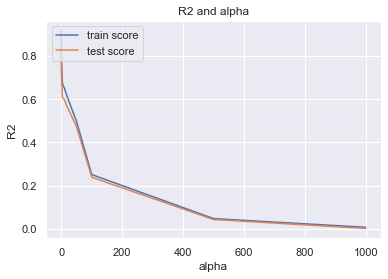

In [251]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [254]:
X_cols = house.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)
print(pd.DataFrame({'feature':list(X_cols.columns),
                    'coef'   :abs(lr.coef_)}).sort_values('coef',ascending=False)[:10].sort_index())

         feature      coef
15   OverallQual  0.060305
16   OverallCond  0.027092
17     YearBuilt  0.003472
18  YearRemodAdd  0.002160
27    Foundation  0.003870
31  BsmtFinType1  0.004944
55   FireplaceQu  0.012295
56    GarageType  0.001601
57   GarageYrBlt  0.000715
69      PoolArea  0.001746


In [ ]:
#### From the above regression model OverallQual is the most important feature and then OverallCond etc

# Lets Apply Ridge now 

In [241]:
### Lets apply Ridge regression regularisation now
alphas = [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
# alphas = [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
#  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0 ]
for i in alphas:
    print(f"Alpha: {i}")
    lr = Ridge(alpha=i)
    lr.fit(X_train, y_train)
    print(f"Training R2: {lr.score(X_train, y_train)}")
    print(f"Testing R2: {lr.score(X_test, y_test)}")

Alpha: 1e-08
Training R2: 0.9134105194589447
Testing R2: -3.3180355771754844
Alpha: 1e-07
Training R2: 0.9134105194589427
Testing R2: -3.3180334098737303
Alpha: 1e-06
Training R2: 0.9134105194587371
Testing R2: -3.3180117369631956
Alpha: 1e-05
Training R2: 0.9134105194381763
Testing R2: -3.3177950176548157
Alpha: 0.0001
Training R2: 0.9134105173832652
Testing R2: -3.3156288036344765
Alpha: 0.001
Training R2: 0.9134103130528463
Testing R2: -3.294064169066112
Alpha: 0.01
Training R2: 0.9133909888958177
Testing R2: -3.087782660792561
Alpha: 0.05
Training R2: 0.9130220665611117
Testing R2: -2.341525488103867
Alpha: 0.1
Training R2: 0.9122043681093426
Testing R2: -1.6845179763583338
Alpha: 0.2
Training R2: 0.9102613292999016
Testing R2: -0.8791926009470021
Alpha: 0.3
Training R2: 0.9084230257267959
Testing R2: -0.4201260171651471
Alpha: 0.4
Training R2: 0.9068313724705833
Testing R2: -0.13199841815054159
Alpha: 0.5
Training R2: 0.9054796060490624
Testing R2: 0.06168301494056261
Alpha: 0.6
T

In [242]:
ridge = Ridge()

# cross validation
folds = 6
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()
print(f"Optimal Value of the Alpha: {model_cv.cv_results_['params'][model_cv.best_index_]}")

Fitting 6 folds for each of 32 candidates, totalling 192 fits
Optimal Value of the Alpha: {'alpha': 0.2}


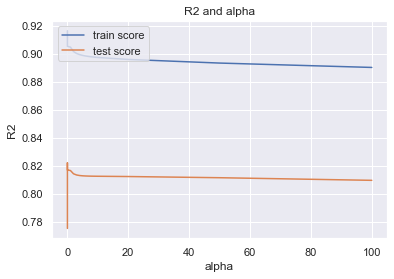

In [243]:
# Lets plot it , plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

##### As per ridge, degree of 6 looks good as Train Score close to 90% and Test score above 80%

### Lets Build the Model without first 5 most important features, considering those features are not available

In [256]:
## Here the list of features most important as per the lasso regression
X_cols = house.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)
print(pd.DataFrame({'feature':list(X_cols.columns),
                    'coef'   :abs(lr.coef_)}).sort_values('coef',ascending=False)[:5].sort_index())

         feature      coef
15   OverallQual  0.060305
16   OverallCond  0.027092
27    Foundation  0.003870
31  BsmtFinType1  0.004944
55   FireplaceQu  0.012295


In [257]:
# Lets drop all those five most important features
X = house.drop(["Id", "SalePrice", "TransformedPrice", "OverallQual", "OverallCond", "Foundation", "BsmtFinType1", "FireplaceQu"], axis=1).values
y = house["TransformedPrice"].values

In [258]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [263]:
### Lets apply LASSO regularisation now
### Now lets find the coefficient
lr = Lasso(alpha=0.02)
lr.fit(X_train, y_train)
print(f"Training R2: {lr.score(X_train, y_train)}")
print(f"Testing R2: {lr.score(X_test, y_test)}")
lr.coef_

Training R2: 0.8138513673045152
Testing R2: 0.7112889944942398


array([-6.28826626e-04,  0.00000000e+00,  1.56291336e-06, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  5.30183159e-04, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  4.85283311e-04,  3.58524468e-03,
        3.65288901e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  3.07160630e-05,  2.49093246e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.54014964e-04,  0.00000000e+00,  1.04093364e-04,  7.88914269e-05,
        5.12838757e-05, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.45702761e-04,  3.05066674e-04,  2.47004536e-04,
        4.44907915e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.37231777e-02,  7.00576473e-03, -4.09214612e-03,
       -9.20788417e-04, -

In [264]:
# Lets find the five most important features now 
X_cols = house.drop(["Id", "SalePrice", "TransformedPrice", "OverallQual", "OverallCond", "Foundation", "BsmtFinType1", "FireplaceQu"], axis=1)
print(pd.DataFrame({'feature':list(X_cols.columns),
                    'coef'   :abs(lr.coef_)}).sort_values('coef',ascending=False)[:5].sort_index())

         feature      coef
15     YearBuilt  0.003585
16  YearRemodAdd  0.003653
49    Functional  0.013723
50    Fireplaces  0.007006
51    GarageType  0.004092
